In [13]:
# 1. Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')



In [155]:
# Load the dataset
df = pd.read_csv('fifa.csv')
# read dataset
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [114]:
# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.
# info
df.info()

# shape
df.shape

#dtypes
df.dtypes

# data acc to selected dtypes
num_df=df.select_dtypes(include=['object','float','int64'])
num_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

(18207, 60)

In [156]:
# 3. Drop the columns which you think redundant for the analysis.
#Drop the redundant columns - Photo
df.drop(labels='Photo', axis=1,inplace=True)

#Drop the redundant columns - Flag
df.drop(labels='Flag', axis=1,inplace=True)

#Drop the redundant columns - Club logo
df.drop(labels='Club Logo', axis=1,inplace=True)

In [157]:
# 4. Convert the columns "Value", "Wage", "Release Clause" to float datatype after getting rid of currency symbol and suffix
#  getting rid of currency symbol for Value col
df['Value'] = df['Value'].str.replace('€', '')
df['Value'] 

0        110.5M
1           77M
2        118.5M
3           72M
4          102M
          ...  
18202       60K
18203       60K
18204       60K
18205       60K
18206       60K
Name: Value, Length: 18207, dtype: object

In [158]:
# removing suffix with multiplier for Value col
df.Value = (df.Value.replace(r'[KMB]+$', '', regex=True).astype(float) * df.Value.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
df['Value'] 

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [159]:
# Converting data type of Value col
df['Value'] = pd.to_numeric(df['Value'], downcast="float")
df['Value'] 

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float32

In [160]:
#  getting rid of currency symbol for Wage col
df['Wage'] = df['Wage'].str.replace('€', '')
df['Wage']

0        565K
1        405K
2        290K
3        260K
4        355K
         ... 
18202      1K
18203      1K
18204      1K
18205      1K
18206      1K
Name: Wage, Length: 18207, dtype: object

In [161]:
# removing suffix with multiplier for Wage col
df.Wage = (df.Wage.replace(r'[KMB]+$', '', regex=True).astype(float) * df.Wage.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
df['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

In [162]:
# Converting data type of Wage col
df['Wage'] = pd.to_numeric(df['Wage'], downcast="float")
df['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float32

In [163]:
#  getting rid of currency symbol for Release Clause col
df['Release Clause'] = df['Release Clause'].str.replace('€', '')
df['Release Clause']

0        226.5M
1        127.1M
2        228.1M
3        138.6M
4        196.4M
          ...  
18202      143K
18203      113K
18204      165K
18205      143K
18206      165K
Name: Release Clause, Length: 18207, dtype: object

In [164]:
# removing suffix with multiplier for Release Clause col
df['Release Clause'] = (df['Release Clause'].replace(r'[KMB]+$', '', regex=True).astype(float) * df['Release Clause'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
df['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

In [165]:
# Converting data type of Release Clause col
df['Release Clause'] = pd.to_numeric(df['Release Clause'], downcast="float")
df['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float32

In [167]:
# 5. Convert the column "Joined" into integer data type with keeping only the year
df['Joined'] 
# showing date as 1 July,2004. split from ',' to get year only
df['Joined']=df['Joined'].str.split(',').str[-1]
df['Joined']

0         2004
1         2018
2         2017
3         2011
4         2015
         ...  
18202     2017
18203     2018
18204     2017
18205     2018
18206     2018
Name: Joined, Length: 18207, dtype: object

In [168]:
# converting into integer without geting value errors for NAN values
df['Joined']=pd.to_numeric(df['Joined'], errors='coerce').convert_dtypes() 
df['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: Int64

In [169]:
# 6. Convert the column "Contract Valid Until" to pandas datetime type
df['Contract Valid Until'] =  pd.to_datetime(df['Contract Valid Until'], infer_datetime_format=False)
df['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [170]:
# 7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points
# replacing quotation mark first
df['Height'] = df['Height'].str.replace("'", '')
df['Height']

0         57
1         62
2         59
3         64
4        511
        ... 
18202     59
18203     63
18204     58
18205    510
18206    510
Name: Height, Length: 18207, dtype: object

In [171]:
# converting into float
df['Height'] = pd.to_numeric(df['Height'], downcast="float")
df['Height']

0         57.0
1         62.0
2         59.0
3         64.0
4        511.0
         ...  
18202     59.0
18203     63.0
18204     58.0
18205    510.0
18206    510.0
Name: Height, Length: 18207, dtype: float32

In [172]:
# 8. The column "Weight" has the suffix as lbs, remove the suffix and convert to float
# replacing lbs
df['Weight'] = df['Weight'].str.replace("lbs", '')
df['Weight']

0        159
1        183
2        150
3        168
4        154
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 18207, dtype: object

In [173]:
# converting into float
df['Weight'] = pd.to_numeric(df['Weight'], downcast="float")
df['Weight']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float32

In [174]:
# 9. Check for the percentage of missing values and impute them with appropriate imputation techniques.
per=pd.DataFrame(df.isnull().mean().round(4).mul(100).sort_values(ascending=False))
print(per)

                              0
Loaned From               93.06
Release Clause             8.59
Joined                     8.53
Contract Valid Until       1.59
Club                       1.32
Jersey Number              0.33
Position                   0.33
GKDiving                   0.26
SlidingTackle              0.26
Agility                    0.26
Reactions                  0.26
Balance                    0.26
ShotPower                  0.26
Jumping                    0.26
Stamina                    0.26
Strength                   0.26
LongShots                  0.26
Aggression                 0.26
Interceptions              0.26
GKReflexes                 0.26
GKPositioning              0.26
GKKicking                  0.26
GKHandling                 0.26
Acceleration               0.26
Positioning                0.26
Vision                     0.26
Penalties                  0.26
Composure                  0.26
Marking                    0.26
StandingTackle             0.26
SprintSp

In [175]:
## The column 'Loaned_from' has 93% of missing values, we will drop that column
df.drop('Loaned From',axis=1,inplace=True)

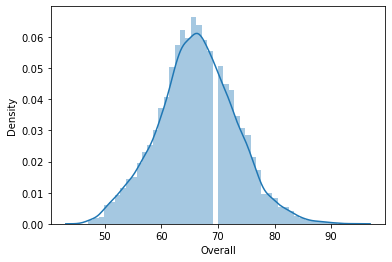

In [176]:
# 10. Plot the distribution of Overall rating for all the players and write your findings.

sns.distplot(df['Overall'])
plt.show()

In [ ]:
- As we can observe, the overall rating ranges from around 45 to 95.
- There are more number of players whose overall ratings is between 60-70.

In [177]:
# 11. Retrieve the names of top20 players based on the Overall rating

# head(20) -- for getting top 20
top_players = df.groupby('Name')['Overall'].max().sort_values(ascending=False).head(20)
top_players

Name
Cristiano Ronaldo    94
L. Messi             94
Neymar Jr            92
Sergio Ramos         91
E. Hazard            91
De Gea               91
L. Suárez            91
L. Modrić            91
K. De Bruyne         91
D. Godín             90
David Silva          90
T. Kroos             90
J. Oblak             90
R. Lewandowski       90
H. Kane              89
T. Courtois          89
S. Agüero            89
M. ter Stegen        89
Sergio Busquets      89
E. Cavani            89
Name: Overall, dtype: int64

In [179]:
# 12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating

top_players_df = df[ (df['Name'].isin(top_players.index)) & (df['Overall'].isin(top_players.values)) ]
top_players_df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [180]:
# 13. What is the average "Age" and "Wage" of these top 20 players? (use the data frame created in the question 11)

top_players_df['Age'].mean()

28.9

In [181]:
top_players_df['Wage'].mean()

301700.0

In [182]:
# 14. Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage
top_players_df[top_players_df['Wage']==top_players_df['Wage'].max()][['Name','Wage']]

,Name,Wage
0,L. Messi,565000.0


In [183]:
# 15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'. (4 Points)

df_ = df[['Name','Club','Wage','Overall']]
df_.head(2)


,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
1,Cristiano Ronaldo,Juventus,405000.0,94


In [184]:
# find the average Overall rating for each club.
df_.groupby('Club')['Overall'].mean()

Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.200000
Name: Overall, Length: 651, dtype: float64

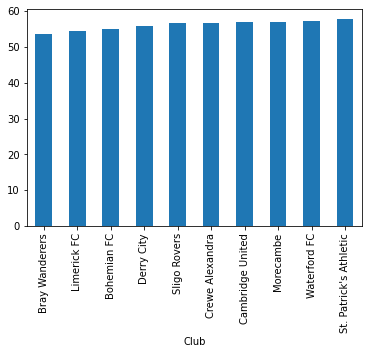

In [186]:
# Display the average overall rating of Top10 Clubs using a plot
df_.groupby('Club')['Overall'].mean().sort_values().head(10).plot(kind='bar')
plt.show()

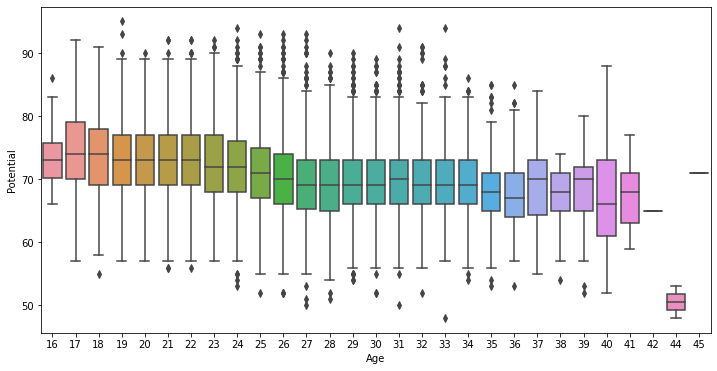

In [190]:
# 16. What is the relationship between age and individual potential of the player?
plt.figure(figsize=(12,6))
sns.boxplot(df['Age'],df['Potential'])
plt.show()

In [ ]:
##Visualize the relationship with appropriate plot and Comment on the same
- Most of cases with increase in age potential is decreasing thus  Age is inversely proportional to potential
- 19-20 Age group shows max potential that will remain almost constant till 30 and then decrease 

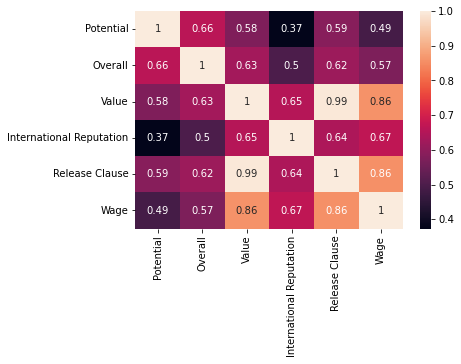

In [192]:
# 17. Which features directly contribute to the wages of the players?
features = df[['Potential','Overall','Value','International Reputation','Release Clause','Wage']]
## plot
sns.heatmap(features.corr(),annot=True)
plt.show()


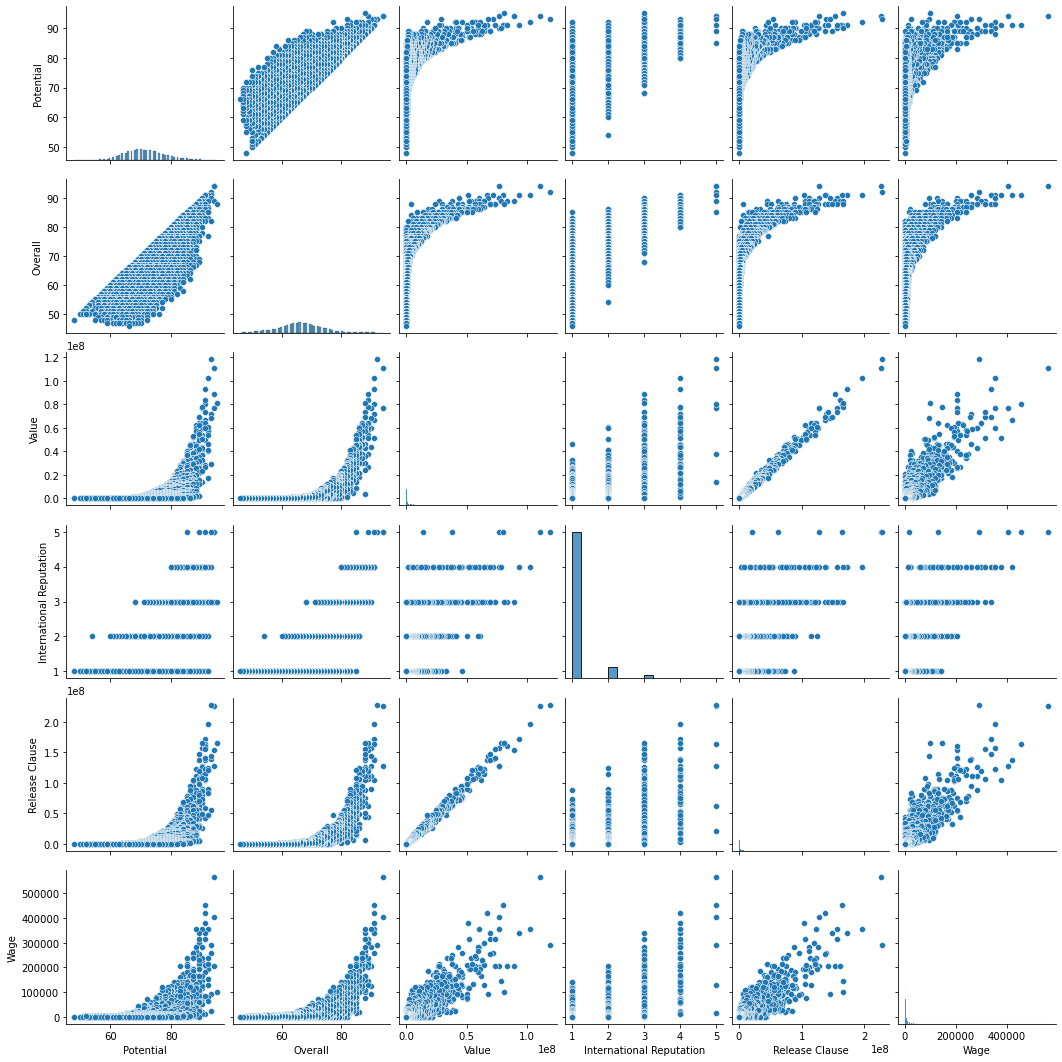

In [193]:
#metric
sns.pairplot(features)
plt.show()

In [195]:
# 18. Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot.

## position in the pitch where the maximum number of players play 
df['Position'].value_counts().sort_values(ascending=False).head(1)

ST    2152
Name: Position, dtype: int64

In [196]:
## position in the pitch where the minimum number of players play 
df['Position'].value_counts().sort_values().head(1)

LF    15
Name: Position, dtype: int64

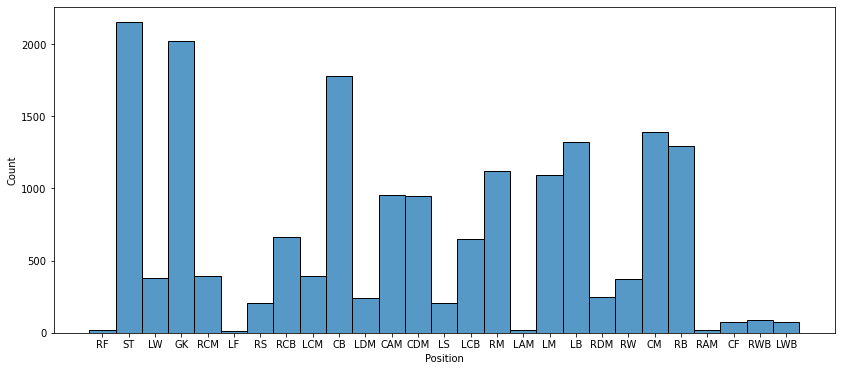

In [198]:
# plot
plt.figure(figsize=(14,6))
sns.histplot(df['Position'])
plt.show()

In [ ]:
Maximum - ST
Minimum - LF

In [207]:
# 19. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players

## players are from the club 'Juventus' and the wage is greater than 200K
df_19=df[(df['Club'] == 'Juventus') & (df['Wage']>200000)]
## player count
df_19.shape
## Information of such players
df_19

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


In [208]:
# 20. Generate a data frame containing top 5 players by Overall rating for each unique position
top_five = df.groupby(['Position']).apply(lambda x : x.sort_values('Overall',ascending=False).head(5))
top_five

ID               Name  Age Nationality  Overall  Potential  \
Position                                                                      
CAM      17  194765       A. Griezmann   27      France       89         90   
         31  190460         C. Eriksen   26     Denmark       88         91   
         61  201942    Roberto Firmino   26      Brazil       86         87   
         66  189596          T. Müller   28     Germany       86         86   
         74  176635            M. Özil   29     Germany       86         86   
...             ...                ...  ...         ...      ...        ...   
ST       1    20801  Cristiano Ronaldo   33    Portugal       94         94   
         10  188545     R. Lewandowski   29      Poland       90         90   
         16  202126            H. Kane   24     England       89         91   
         23  153079          S. Agüero   30   Argentina       89         89   
         36  173731            G. Bale   28       Wales       88         88   

                          Club       Value      Wage Preferred Foot  ...  \
Position                                                             ...   
CAM      17    Atlético Madrid  78000000.0  145000.0           Left  ...   
         31  Tottenham Hotspur  73500000.0  205000.0          Right  ...   
         61          Liverpool  53000000.0  195000.0          Right  ...   
         66  FC Bayern München  45000000.0  135000.0          Right  ...   
         74            Arsenal  43500000.0  190000.0           Left  ...   
...                        ...         ...       ...            ...  ...   
ST       1            Juventus  77000000.0  405000.0          Right  ...   
         10  FC Bayern München  77000000.0  205000.0          Right  ...   
         16  Tottenham Hotspur  83500000.0  205000.0          Right  ...   
         23    Manchester City  64500000.0  300000.0          Right  ...   
         36        Real Madrid  60000000.0  355000.0           Left  ...   

             Composure  Marking  StandingTackle SlidingTackle GKDiving  \
Position                                                                 
CAM      17       87.0     59.0            47.0          48.0     14.0   
         31       88.0     59.0            57.0          22.0      9.0   
         61       87.0     60.0            64.0          42.0      8.0   
         66       83.0     44.0            41.0          44.0      6.0   
         74       82.0     24.0            16.0          19.0      6.0   
...                ...      ...             ...           ...      ...   
ST       1        95.0     28.0            31.0          23.0      7.0   
         10       86.0     34.0            42.0          19.0     15.0   
         16       89.0     56.0            36.0          38.0      8.0   
         23       90.0     30.0            20.0          12.0     13.0   
         36       86.0     54.0            55.0          52.0     15.0   

            GKHandling  GKKicking  GKPositioning GKReflexes  Release Clause  
Position                                                                     
CAM      17        8.0       14.0           13.0       14.0     165800000.0  
         31       14.0        7.0            7.0        6.0     141500000.0  
         61       11.0        9.0            6.0       10.0     104700000.0  
         66        7.0       11.0           14.0       14.0      74300000.0  
         74       14.0       10.0            6.0       14.0      82700000.0  
...                ...        ...            ...        ...             ...  
ST       1        11.0       15.0           14.0       11.0     127100000.0  
         10        6.0       12.0            8.0       10.0     127100000.0  
         16       10.0       11.0           14.0       11.0     160700000.0  
         23       15.0        6.0           11.0       14.0     119300000.0  
         36       15.0       11.0            5.0        6.0     123000000.0  

[135 rows x 56 columns

In [209]:
# 21. What is the average wage one can expect to pay for the top 5 players in every position?
top_five['Wage'].groupby('Position').mean()

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float32